# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

# Reading Image

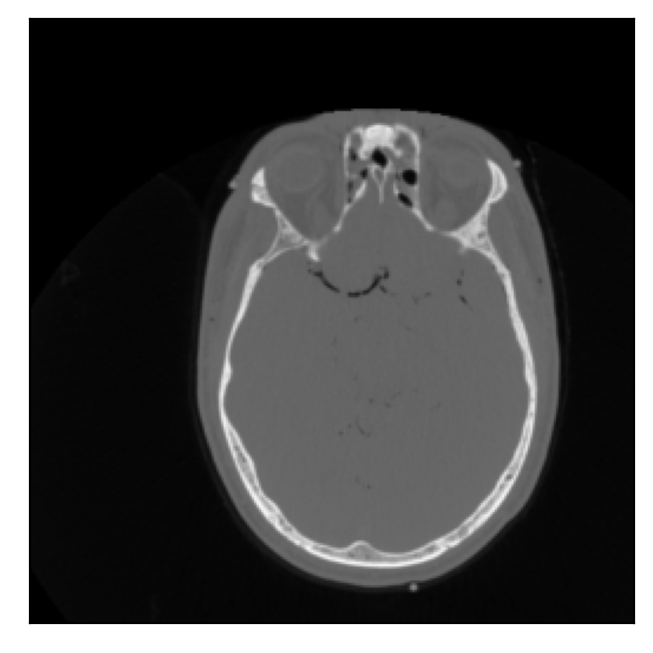

In [2]:
img = iio.imread('ct.jpg')

def show_image(img, title='', save=False, name=''):
    '''
    a function for showing images
    '''
    plt.figure(dpi=200)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    if save:
        plt.savefig(name)
    plt.show()
    
show_image(img)

# Zoom-in

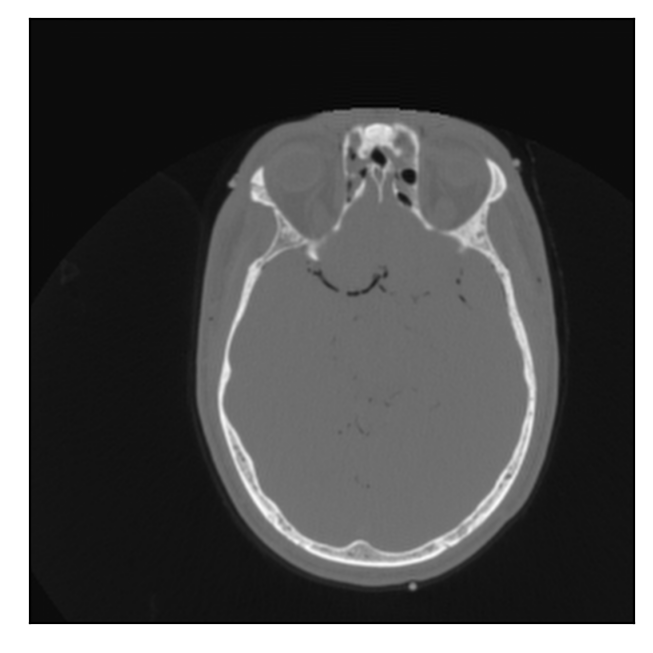

In [3]:
def zoom_in(img, X, Y):
    '''
    a function for zoom-in with zero padding in frequency domain
    img is the input img
    X is number of additional zeros in x direction
    Y is number of additional in y direction
    '''
    f = np.fft.fftshift(np.fft.fft2(img))
    fnew = np.zeros((f.shape[0]+X, f.shape[1]+Y), dtype='complex')
    fnew[X//2:X//2+f.shape[0], Y//2:Y//2+f.shape[1]] = f.copy()
    new_img = np.fft.ifft2(np.fft.ifftshift(fnew)).real
    new_img = (new_img-np.min(new_img))/(np.max(new_img)-np.min(new_img))*255
    return np.uint8(new_img)

def zoom_in_rgb(img, X, Y):
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    newr = zoom_in(r, X, Y)
    newg = zoom_in(g, X, Y)
    newb = zoom_in(b, X, Y)
    return np.dstack((newr, newg, newb))
    
    
show_image(zoom_in_rgb(img, 500, 500))